# **MANOVA실습**
Breast_cancer데이터셋을 사용


In [2]:
# Library 불러오기
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

import matplotlib as mpl
print(mpl.get_cachedir())
mpl.rc('font', family='Malgun Gothic')

import matplotlib.pyplot as plt
import seaborn as sns

/home/jovyan/.cache/matplotlib


In [3]:
# Load the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.columns = df.columns.str.replace(' ', '_')
# 데이터셋의 처음 몇 줄을 표시
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
df.info() #결측치존재하지 않음.
#mean_radius: 평균 반지름
#mean_texture: 평균 질감
#mean_perimeter: 평균 둘레
#mean_area: 평균 면적
#mean_smoothness: 평균 매끄러움
#mean_compactness: 평균 조밀도
#mean_concavity: 평균 오목도
#mean_concave_points: 평균 오목한 점의 개수
#mean_symmetry: 평균 대칭성
#mean_fractal_dimension: 평균 프랙탈 차원
#radius_error: 반지름 오차
#texture_error: 질감 오차
#perimeter_error: 둘레 오차
#area_error: 면적 오차
#smoothness_error: 매끄러움 오차
#compactness_error: 조밀도 오차
#concavity_error: 오목도 오차
#concave_points_error: 오목한 점의 오차
#symmetry_error: 대칭성 오차
#fractal_dimension_error: 프랙탈 차원 오차
#worst_radius: 최대 반지름
#worst_texture: 최대 질감
#worst_perimeter: 최대 둘레
#worst_area: 최대 면적
#worst_smoothness: 최대 매끄러움
#worst_compactness: 최대 조밀도
#worst_concavity: 최대 오목도
#worst_concave_points: 최대 오목한 점의 개수
#worst_symmetry: 최대 대칭성
#worst_fractal_dimension: 최대프랙탈 차원
#target: 종양이 양성인지 악성인지를 나타내는 이진 분류 값 (0: 양성, 1: 악성)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [4]:
# MANOVA 수행
# intercept: 절편의 유의미성
# target: 종양 양성 악성에 따른 차이의 유의미성
maov = MANOVA.from_formula('mean_radius + mean_texture + mean_perimeter + mean_area+ mean_smoothness ~ target', data=df)
print(maov.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda   0.0057 5.0000 563.0000 19514.8514 0.0000
         Pillai's trace   0.9943 5.0000 563.0000 19514.8514 0.0000
 Hotelling-Lawley trace 173.3113 5.0000 563.0000 19514.8514 0.0000
    Roy's greatest root 173.3113 5.0000 563.0000 19514.8514 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
             target         Value  Num DF  Den DF  F Value  Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.3535 5.0000 563.0000 205.9183 0.0000
             Pil

1. Wilks' Lambda: 
- 값이 작을수록 독립 변수가 종속 변수에 미치는 영향이 크다는 것을 나타냄. 
- 여기서 값이 0.0057으로 매우 작으며, 이는 유의미한 차이를 나타냄.

2. Pillai's Trace: 
- 값이 클수록 유의미한 차이가 있다는 것을 나타냄. 
- 여기서 값이 0.9943로 매우 큼.

3. Hotelling-Lawley Trace: 
- 값이 클수록 유의미한 차이가 있다는 것을 나타냄. 
- 여기서 값이 173.3113으로 매우 큼.

4. Roy's Greatest Root: 
- 가장 큰 고유값을 기준으로 하며, 값이 클수록 유의미한 차이가 있다는 것을 나타냄. 
- 여기서 값이 173.3113으로 매우 큼.

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(

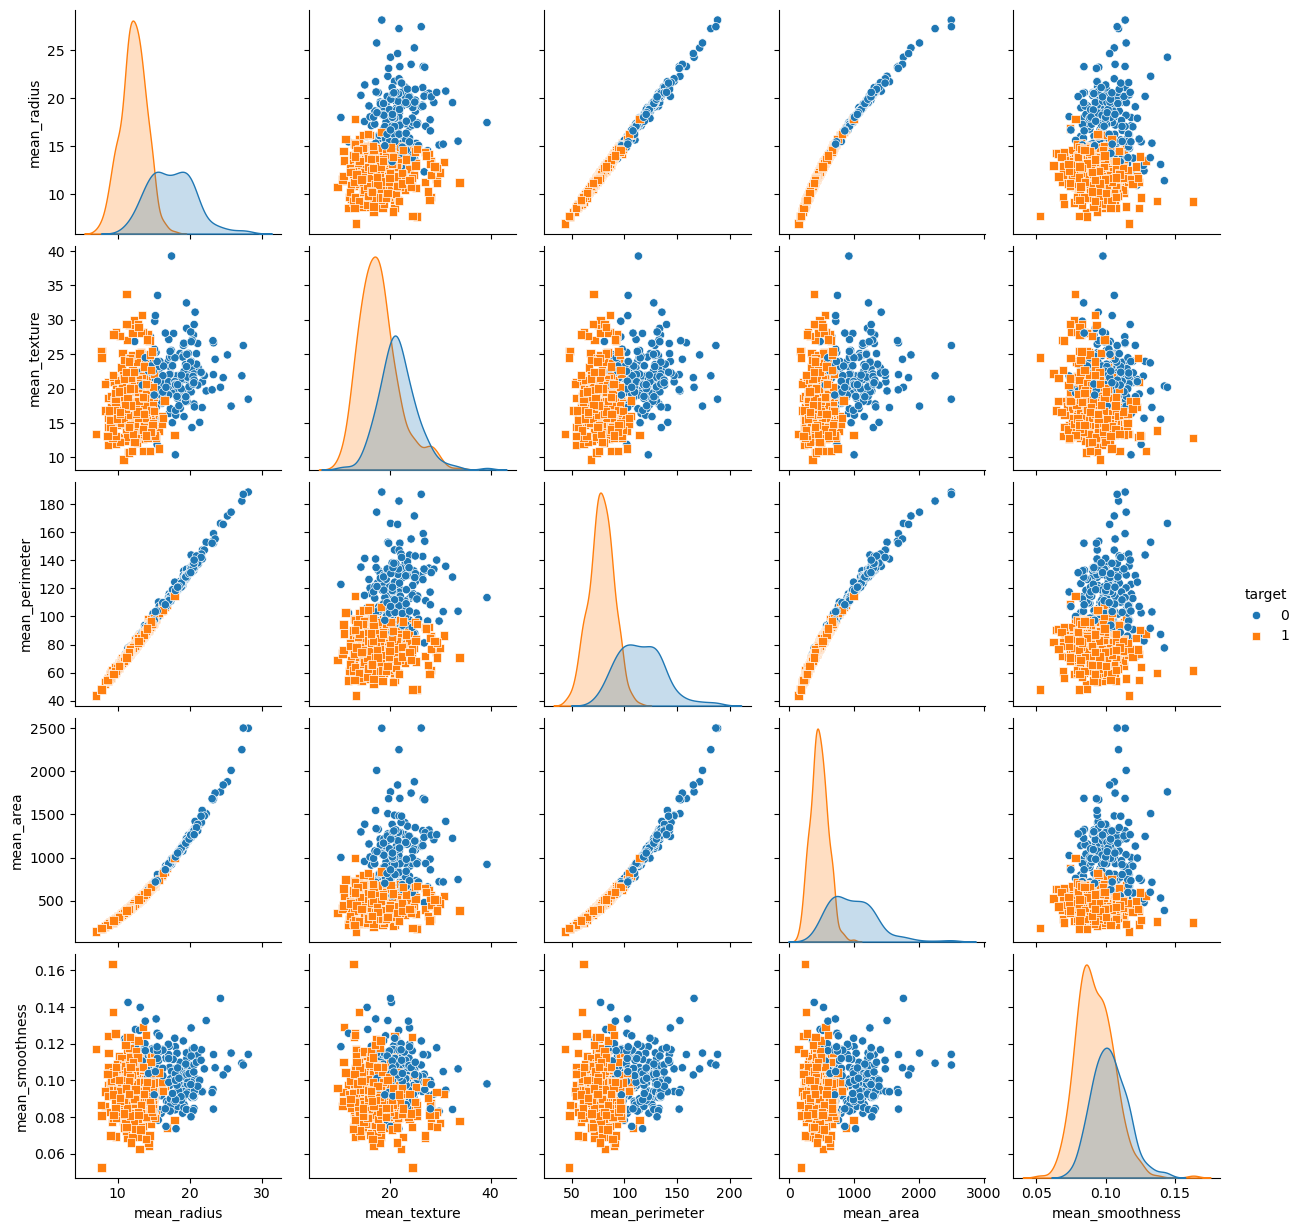

In [5]:
# 데이터셋의 pairplot
sns.pairplot(df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness' ,'target']], hue='target', markers=["o", "s", "D"])
plt.show()

### MANOVA 해석
- 다변량 테스트 결과(Wilks’ Lambda, Pillai’s Trace, Hotelling-Lawley Trace, Roy’s Greatest Root)를 확인
- p-값을 해석하여 결합된 종속 변수 간에 유의미한 차이가 있는지 확인


- 결론: 이 MANOVA 분석 결과는 종양 양성 악성 유무와 절편이 4가지 다변량 종속 변수에 대해 매우 유의미한 영향을 미친다는 것을 보여준다. 이 모든 테스트의 p-값이 0.0000으로 나타나 유의 수준 0.05보다 훨씬 낮기 때문에, 귀무 가설(즉, 조양 양성 악서 유무와 절편이 다변량 종속 변수에 영향을 미치지 않는다는 가설)을 기각할 수 있다. 다변량 종속 변수에 실제로 유의미한 영향을 미친다는 강력한 증거이다.

# **2. PCA실습**
Breast_cancer데이터셋을 사용

In [6]:
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()  # load_breast_cancer 함수 호출

# DataFrame 생성
X = DataFrame(data['data'], columns=data['feature_names'])
X.columns = X.columns.str.replace(' ', '_')
y=data['target']

In [7]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_X=DataFrame(ss.fit_transform(X), columns=X.columns)

In [8]:
#pca적합
from sklearn.decomposition import PCA
model=PCA(n_components=X.shape[1],svd_solver='auto')
model.fit(scaled_X)

PCA(n_components=30)

In [9]:
#고유값 요약
e_value=DataFrame({'고유값':model.explained_variance_,'기여율':model.explained_variance_ratio_},index=['comps%s'%i for i in range(1,X.shape[1]+1)])
e_value['누적기여율']=e_value['기여율'].cumsum()
print("고유값 요약:/n",e_value,"/n")

고유값 요약:/n                고유값       기여율     누적기여율
comps1   13.304991  0.442720  0.442720
comps2    5.701375  0.189712  0.632432
comps3    2.822910  0.093932  0.726364
comps4    1.984128  0.066021  0.792385
comps5    1.651633  0.054958  0.847343
comps6    1.209482  0.040245  0.887588
comps7    0.676409  0.022507  0.910095
comps8    0.477456  0.015887  0.925983
comps9    0.417629  0.013896  0.939879
comps10   0.351311  0.011690  0.951569
comps11   0.294433  0.009797  0.961366
comps12   0.261621  0.008705  0.970071
comps13   0.241782  0.008045  0.978117
comps14   0.157286  0.005234  0.983350
comps15   0.094301  0.003138  0.986488
comps16   0.080003  0.002662  0.989150
comps17   0.059504  0.001980  0.991130
comps18   0.052711  0.001754  0.992884
comps19   0.049565  0.001649  0.994533
comps20   0.031214  0.001039  0.995572
comps21   0.030026  0.000999  0.996571
comps22   0.027488  0.000915  0.997486
comps23   0.024384  0.000811  0.998297
comps24   0.018087  0.000602  0.998899
comps25   0.015

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

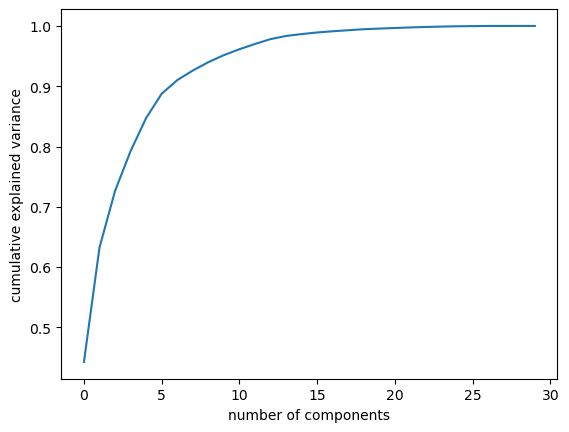

In [10]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [11]:
#comp4개 정도가 전체 데이터 분산의 80%를 설명하고 있다.
#pca적합
model=PCA(n_components=4,svd_solver='auto')
model.fit(scaled_X)
pca_result=model.fit_transform(scaled_X)

#고유벡터 요약
e_vector = DataFrame(model.components_, index=['comp%s'%i for i in range(1,5)],columns=scaled_X.columns)
print("고유벡터 요약:/n",e_vector.iloc[:,:4],"/n")#4개까지만 확인

고유벡터 요약:/n        mean_radius  mean_texture  mean_perimeter  mean_area
comp1     0.218902      0.103725        0.227537   0.220995
comp2    -0.233857     -0.059706       -0.215181  -0.231077
comp3    -0.008531      0.064550       -0.009314   0.028700
comp4     0.041409     -0.603050        0.041983   0.053434 /n


# **3. 요인 분석**
### 이론
요인 분석은 변수들 간의 잠재적 관계를 식별하는 데 사용된다. 관측된 변수의 수를 줄여 더 적은 수의 요인으로 만든다.

#Breast_cancer데이터셋을 사용

In [12]:
# 요인 분석 수행

from pandas import DataFrame
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()  # load_breast_cancer 함수 호출

# DataFrame 생성
X = DataFrame(data['data'], columns=data['feature_names'])
X.columns = X.columns.str.replace(' ', '_')
y=data['target']

#데이터 표준화
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_X=DataFrame(ss.fit_transform(X), columns=X.columns)

#FA적합
fa = FactorAnalyzer(n_factors=4)
fa.fit(scaled_X)
factor_loadings = fa.loadings_

# 요인 적재값 표시
loading_df = pd.DataFrame(factor_loadings, index=data.feature_names, columns=['요인 1', '요인 2','요인3','요인4'])
print(loading_df)


                             요인 1      요인 2       요인3       요인4
mean radius              0.992297 -0.017792 -0.213825  0.012412
mean texture             0.093042  0.039982  0.063281  0.872003
mean perimeter           0.980100  0.024979 -0.186422  0.011759
mean area                1.020202 -0.071403 -0.146990 -0.000522
mean smoothness          0.050480  0.581234  0.156455 -0.153060
mean compactness         0.298527  0.702933  0.196485 -0.007473
mean concavity           0.546837  0.477427  0.208304  0.026195
mean concave points      0.734036  0.371456  0.042819 -0.025630
mean symmetry            0.027207  0.502063  0.242818 -0.050236
mean fractal dimension  -0.480617  0.670018  0.468415 -0.083055
radius error             0.886942 -0.268139  0.396425 -0.044882
texture error           -0.093175 -0.308998  0.636112  0.452649
perimeter error          0.867207 -0.232044  0.417153 -0.035829
area error               0.936558 -0.261748  0.249927 -0.058690
smoothness error        -0.151975 -0.090

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:84: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found

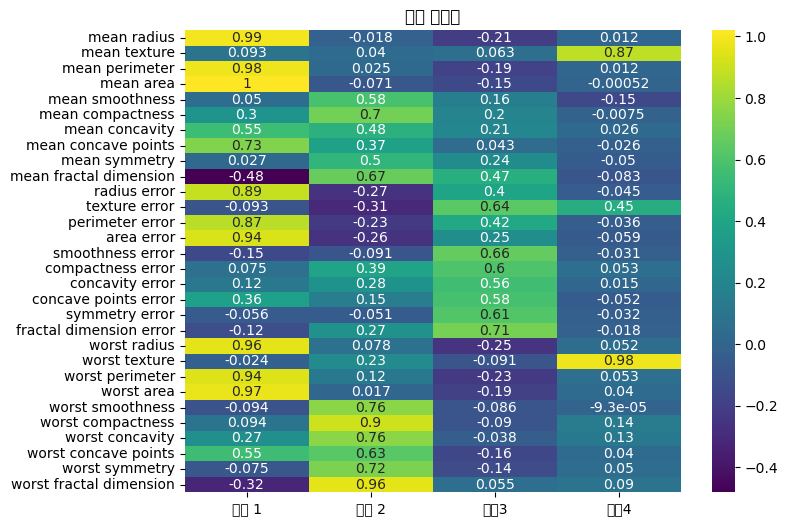

In [13]:
# 요인 적재값 시각화
plt.figure(figsize=(8,6))
sns.heatmap(loading_df, annot=True, cmap='viridis')
plt.title('요인 적재값')
plt.show()

### 요인 분석 해석
1. 요인의 의미

- 요인 분석을 통해 발견된 각 요인은 여러 관찰된 변수들에 의해 설명된다. 
- 각 요인이 어떤 의미를 가지는지 해석하기 위해 각 요인에 크게 적재된 변수들을 살펴보아야 한다.

2. 요인 적재치 (Factor Loadings)

- 요인 적재치는 각 변수와 요인 사이의 상관관계를 나타낸다. 
- 높은 적재치를 가진 변수들은 그 요인에 더 큰 기여. 일반적으로 절대값이 0.4 이상인 적재치를 중요한 것으로 간주한다.

3. 요인 회전 (Factor Rotation)

- 요인 회전은 요인 적재치를 더 명확하게 해석하기 위해 사용된다.
- Varimax 회전과 같은 직교 회전은 요인 해석을 더 쉽게 만들어 줌.

4. 공통성 (Communalities)

- 공통성은 각 변수의 분산 중에서 요인들에 의해 설명되는 부분을 나타낸다. 
- 높은 공통성은 해당 변수가 요인 구조에 잘 맞는다는 것을 의미한다.

### 요인 회전 (Factor Rotation)

- Varimax 회전은 요인 적재치를 더 쉽게 해석할 수 있도록 하는 직교 회전 방법 중 하나임. 
- Varimax 회전을 적용하면 요인 적재치가 더 명확하게 구분되어 각 요인이 어떤 변수들과 관련이 있는지 더 잘 이해할 수 있음.


In [84]:
# Varimax 회전 적용
fa_rotated = FactorAnalyzer(n_factors=4, rotation='varimax')
fa_rotated.fit(scaled_X)

# 요인 적재치 출력
loadings = fa_rotated.loadings_
print("Varimax 회전 후 요인 적재치:")
print(pd.DataFrame(loadings, index=data.feature_names))

Varimax 회전 후 요인 적재치:
                                0         1         2         3
mean radius              0.951349  0.136729 -0.141917  0.096187
mean texture             0.252028  0.063568  0.065240  0.870065
mean perimeter           0.950158  0.181285 -0.109170  0.096168
mean area                0.968604  0.104997 -0.083259  0.086403
mean smoothness          0.157046  0.604281  0.251164 -0.128265
mean compactness         0.451792  0.778618  0.325580  0.041573
mean concavity           0.651281  0.613584  0.317920  0.092129
mean concave points      0.792173  0.514445  0.153203  0.051239
mean symmetry            0.139950  0.540864  0.319919 -0.028755
mean fractal dimension  -0.310552  0.648721  0.531643 -0.097264
radius error             0.820398  0.004455  0.406188  0.039869
texture error           -0.042951 -0.184941  0.559245  0.446413
perimeter error          0.811713  0.039573  0.430720  0.048396
area error               0.859222 -0.010400  0.267982  0.027151
smoothness error   

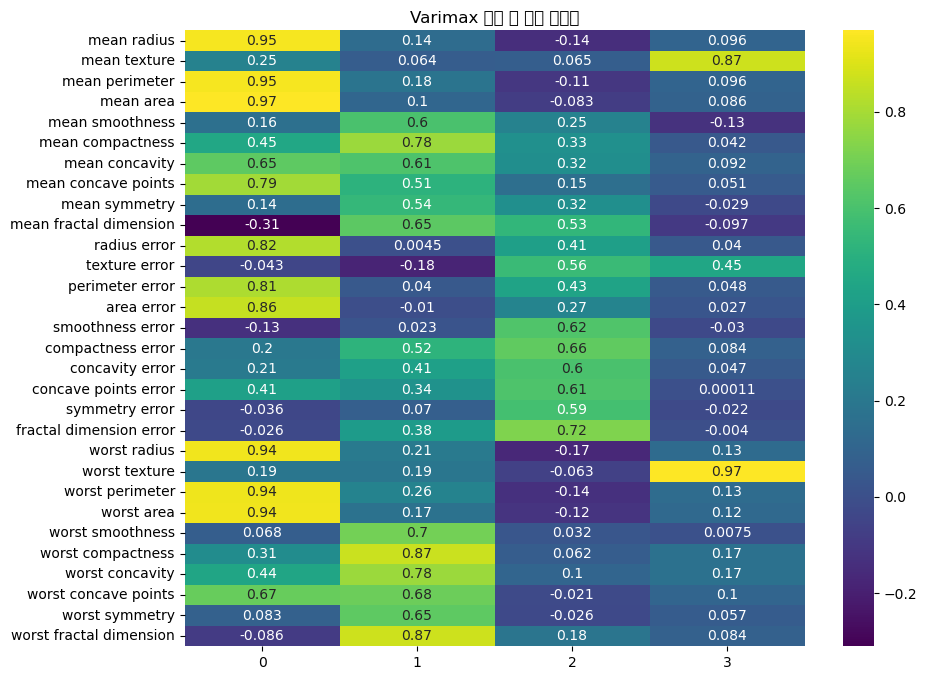

In [83]:
# 요인 적재치 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(loadings, index=data.feature_names), annot=True, cmap='viridis')
plt.title('Varimax 회전 후 요인 적재치')
plt.show()

1. 요인 0:
- 종양의 크기 및 면적 (mean radius, mean perimeter, mean area 등)
2. 요인 1:
- 종양의 형태 및 경계의 복잡성 (mean smoothness, mean compactness, mean concavity 등)
3. 요인 2:
- 측정 오차 (texture error, smoothness error, compactness error 등)
4. 요인 3:
- 종양의 질감 (mean texture, worst texture 등)이다.

### 공통성(Communalities)
- 공통성(Communalities)은 각 변수의 분산 중에서 요인들에 의해 설명되는 부분
- 공통성이 높을수록 해당 변수가 요인 구조에 잘 맞는다는 것을 의미

In [86]:
# 요인 분석 수행
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(scaled_X)

# 요인 적재치 출력
loadings = fa.loadings_
print("Varimax 회전 후 요인 적재치:")
print(pd.DataFrame(loadings, index=data.feature_names))

Varimax 회전 후 요인 적재치:
                                0         1         2         3
mean radius              0.951349  0.136729 -0.141917  0.096187
mean texture             0.252028  0.063568  0.065240  0.870065
mean perimeter           0.950158  0.181285 -0.109170  0.096168
mean area                0.968604  0.104997 -0.083259  0.086403
mean smoothness          0.157046  0.604281  0.251164 -0.128265
mean compactness         0.451792  0.778618  0.325580  0.041573
mean concavity           0.651281  0.613584  0.317920  0.092129
mean concave points      0.792173  0.514445  0.153203  0.051239
mean symmetry            0.139950  0.540864  0.319919 -0.028755
mean fractal dimension  -0.310552  0.648721  0.531643 -0.097264
radius error             0.820398  0.004455  0.406188  0.039869
texture error           -0.042951 -0.184941  0.559245  0.446413
perimeter error          0.811713  0.039573  0.430720  0.048396
area error               0.859222 -0.010400  0.267982  0.027151
smoothness error   

In [18]:
# 공통성 계산
communalities = fa.get_communalities()
print("공통성:")
print(pd.DataFrame(communalities, index=data.feature_names, columns=["공통성"]))


공통성:
                              공통성
mean radius              1.030845
mean texture             0.774648
mean perimeter           0.996112
mean area                1.067518
mean smoothness          0.388286
mean compactness         0.621895
mean concavity           0.571044
mean concave points      0.679278
mean symmetry            0.314292
mean fractal dimension   0.906227
radius error             1.017731
texture error            0.713690
perimeter error          0.981193
area error               1.011561
smoothness error         0.468638
compactness error        0.523040
concavity error          0.407024
concave points error     0.489381
symmetry error           0.382724
fractal dimension error  0.588674
worst radius             0.990548
worst texture            1.029340
worst perimeter          0.956450
worst area               0.979614
worst smoothness         0.596058
worst compactness        0.853708
worst concavity          0.666666
worst concave points     0.728865
worst sym

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

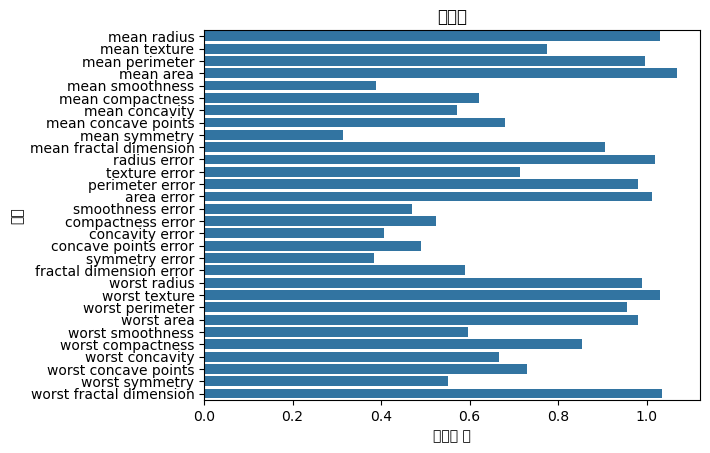

In [20]:
# 공통성 시각화
sns.barplot(x=communalities, y=data.feature_names, orient='h')
plt.title('공통성')
plt.xlabel('공통성 값')
plt.ylabel('변수')
plt.show()


In [21]:
#요인모델이 변수를 얼마나 잘 설명하는가?
#공통성 값이 대체로 0.5 이상이면 모델이 대부분의 변수를 잘 설명하고 있다고 볼 수 있다. 
#전반적으로 모델이 대부분의 변수를 잘 설명하고 있으나 mean symmetry, smoothness error, symmetry error 등 몇몇 변수는 추가적인 요인 분석이나 다른 모델링 접근이 필요할 수 있다.
